In [1]:
# OPTIONAL: Load the "autoreload" eX_orig[alias]tension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
import matplotlib.patches as patches
from matplotlib.legend_handler import HandlerPatch
from mpl_toolkits.axes_grid1 import make_axes_locatable

from sklearn.preprocessing import StandardScaler

from src.config import get_hussmann_supplementary_xlsx, HOME_PATH, FILTER_COUNT, METHOD, PROFILE_TYPE, SAMPLE, PAIRED_SAMPLES, get_experiment_artifacts
from src.visualization.plots import psuedocontrolcomparisonplot, gene_sample_frequency_change_heatmap

from sklearn.metrics import PrecisionRecallDisplay, jaccard_score

In [3]:
from matplotlib.font_manager import findfont, FontProperties
font = findfont(FontProperties(family=['sans-serif']))
font

'/Users/colm/anaconda3/envs/MUSICian/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'

In [4]:
sns.set_theme(style="white", palette="muted")
sns.set_context("paper", font_scale = 1.3)

import matplotlib as mpl

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True


In [5]:
full_results_df = pd.read_pickle(get_experiment_artifacts() + "/augmented_with_GO_outlier_results.pkl")

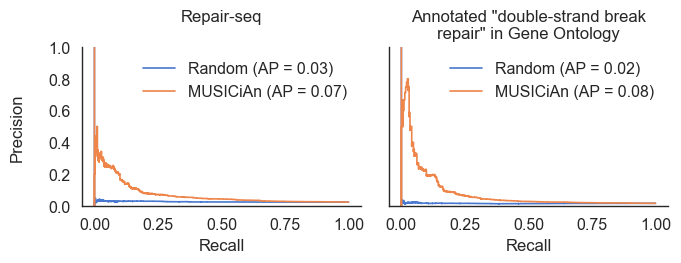

In [6]:
from sklearn import metrics

def plot_curves(outliers_df, genes, ax):
    y = np.isin(outliers_df.sample(frac=1).index.to_list(), genes)

    display = PrecisionRecallDisplay.from_predictions(
        y,
        list(range(len(y)))[::-1],
        ax=ax,
        name="Random"
    )


    y = np.isin(outliers_df.sort_values(("Global", "Mean Std Consistency")).index.to_list(), genes)
    display = PrecisionRecallDisplay.from_predictions(
        y,
        list(range(len(y))),
        ax=ax,
        name="MUSICiAn"
    )
    ax.legend(loc='upper right', frameon=False)
    ax.set_ylim(0, 1)

fig_1b = plt.figure(figsize=(7, 2.5))
ax = fig_1b.subplots(1, 2, sharex=True, sharey=True)
adamson_genes = pd.read_excel(get_hussmann_supplementary_xlsx(4), sheet_name="Table S4", skiprows=1)["Gene"].str.capitalize()
plot_curves(full_results_df, adamson_genes, ax[0])
ax[0].set_title("Repair-seq\n", fontsize=12)
ax[0].set_xlabel("Recall", fontsize=12)
ax[0].set_ylabel("Precision\n", fontsize=12)

GODSBRepair = full_results_df.loc[full_results_df[("Global", "isGODSBRepair")]].index.to_list()
plot_curves(full_results_df, GODSBRepair, ax[1])
ax[1].set_title('Annotated "double-strand break\nrepair" in Gene Ontology', fontsize=12)
ax[1].set_xlabel("Recall", fontsize=12)
ax[1].set_ylabel(None)

# plt.suptitle("Ranking Performance", fontsize=14)

plt.tight_layout(rect=[0, -0.05, 1, 1.075])
plt.savefig("artifacts/ranking_performance.pdf")


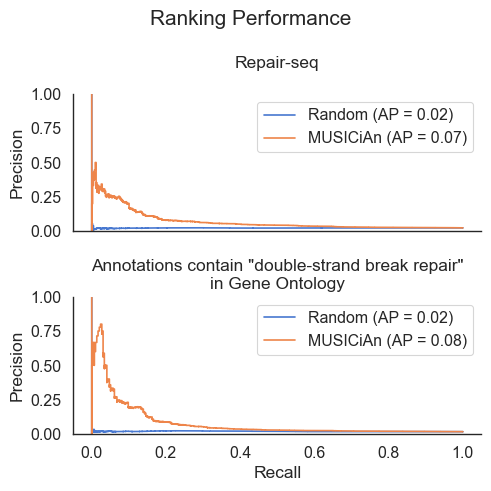

In [7]:
from sklearn import metrics

def plot_curves(outliers_df, genes, ax):
    y = np.isin(outliers_df.sample(frac=1).index.to_list(), genes)

    display = PrecisionRecallDisplay.from_predictions(
        y,
        list(range(len(y)))[::-1],
        ax=ax,
        name="Random"
    )


    y = np.isin(outliers_df.sort_values(("Global", "Mean Std Consistency")).index.to_list(), genes)
    display = PrecisionRecallDisplay.from_predictions(
        y,
        list(range(len(y))),
        ax=ax,
        name="MUSICiAn"
    )
    ax.legend(loc='upper right')
    ax.set_ylim(0, 1)

fig_1b = plt.figure(figsize=(5, 5))
ax = fig_1b.subplots(2, 1, sharex=True, sharey=True)
adamson_genes = pd.read_excel(get_hussmann_supplementary_xlsx(4), sheet_name="Table S4", skiprows=1)["Gene"].str.capitalize()
plot_curves(full_results_df, adamson_genes, ax[0])
ax[0].set_title("Repair-seq\n ")
ax[0].set_xlabel(None)
ax[0].set_ylabel("Precision")

GODSBRepair = full_results_df.loc[full_results_df[("Global", "isGODSBRepair")]].index.to_list()
plot_curves(full_results_df, GODSBRepair, ax[1])
ax[1].set_title('Annotations contain "double-strand break repair"\nin Gene Ontology')
ax[1].set_xlabel("Recall")
ax[1].set_ylabel("Precision")

plt.suptitle("Ranking Performance")

# plt.tight_layout(rect=[0, -0.05, 1, 1.075])
plt.tight_layout()
plt.savefig("artifacts/ranking_performance_vertical.pdf")


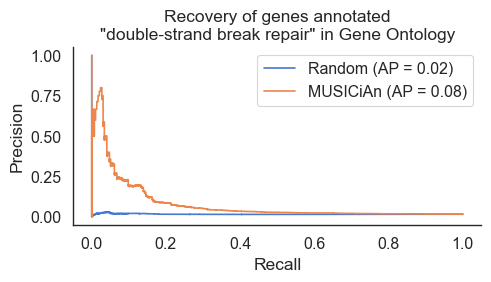

In [8]:
from sklearn import metrics

def plot_curves(outliers_df, genes, ax):
    y = np.isin(outliers_df.sample(frac=1).index.to_list(), genes)

    display = PrecisionRecallDisplay.from_predictions(
        y,
        list(range(len(y)))[::-1],
        ax=ax,
        name="Random"
    )


    y = np.isin(outliers_df.sort_values(("Global", "Mean Std Consistency")).index.to_list(), genes)
    display = PrecisionRecallDisplay.from_predictions(
        y,
        list(range(len(y))),
        ax=ax,
        name="MUSICiAn"
    )
    ax.legend(loc='upper right')

fig_1b = plt.figure(figsize=(5, 3))
ax = fig_1b.subplots(1, 1, sharex=True, sharey=True)

GODSBRepair = full_results_df.loc[full_results_df[("Global", "isGODSBRepair")]].index.to_list()
plot_curves(full_results_df, GODSBRepair, ax)
ax.set_title('Recovery of genes annotated\n"double-strand break repair" in Gene Ontology')
ax.set_xlabel("Recall")
ax.set_ylabel("Precision")

plt.tight_layout()
plt.savefig("artifacts/fig_3a_GO_only.pdf")
plt.savefig("artifacts/fig_3a_GO_only.png")

In [9]:
godf = pd.read_excel("{}/outliers.xlsx".format(get_experiment_artifacts()))
godf.head(10)

,GO,NS,enrichment,name,ratio_in_study,ratio_in_pop,p_uncorrected,depth,study_count,p_fdr_bh,study_items
0,GO:0006281,BP,e,DNA repair,65/496,361/18000,2.050074e-34,7,65,2.589654e-30,"11920, 12021, 12189, 12572, 13006, 13194, 1408..."
1,GO:0006364,BP,e,rRNA processing,37/496,120/18000,7.706069e-29,9,37,4.867153e-25,"12181, 19989, 20085, 27993, 52513, 52530, 5270..."
2,GO:0006974,BP,e,cellular response to DNA damage stimulus,64/496,487/18000,8.669584e-26,4,64,3.650473e-22,"11920, 12021, 12189, 12572, 13006, 13194, 1408..."
3,GO:0042254,BP,e,ribosome biogenesis,29/496,89/18000,1.261630e-23,5,29,3.984228e-20,"12181, 22596, 27993, 52513, 52530, 52705, 5341..."
4,GO:0006397,BP,e,mRNA processing,41/496,324/18000,3.126867e-16,8,41,7.899717e-13,"14105, 15387, 16588, 17149, 20638, 20901, 2268..."
5,GO:0006260,BP,e,DNA replication,24/496,106/18000,1.014208e-15,7,24,2.135245e-12,"16588, 17219, 18538, 18971, 18972, 18973, 1907..."
6,GO:0000724,BP,e,double-strand break repair via homologous reco...,21/496,87/18000,1.623861e-14,9,21,2.930373e-11,"11920, 12189, 15270, 17535, 19361, 19362, 1936..."
7,GO:0002181,BP,e,cytoplasmic translation,13/496,27/18000,6.376351e-14,8,13,1.006826e-10,"14109, 19989, 20085, 20103, 26961, 27050, 5780..."
8,GO:0008380,BP,e,RNA splicing,31/496,243/18000,1.171030e-12,8,31,1.643606e-09,"14105, 15387, 15469, 17149, 20638, 20901, 2268..."
9,GO:0006412,BP,e,translation,28/496,200/18000,1.498965e-12,7,28,1.893493e-09,"13667, 14109, 19989, 20085, 20103, 20918, 2232..."


In [10]:
!pip show gseapy

Name: gseapy
Version: 1.0.5
Summary: Gene Set Enrichment Analysis in Python
Home-page: https://github.com/zqfang/gseapy
Author: Zhuoqing Fang
Author-email: fzq518@gmail.com
License: MIT
Location: /Users/colm/anaconda3/envs/MUSICian/lib/python3.9/site-packages
Requires: matplotlib, numpy, pandas, requests, scipy
Required-by: 


In [11]:
# https://medium.com/omics-diary/how-to-use-gseapy-for-pathway-enrichment-analysis-67a1aab1002d

import gseapy as gp

names = gp.get_library_name()

print([n for n in names if "KEGG" in n])

genes = pd.read_csv("../exploratory/outlier_detection/artifacts/final_gene_list.tsv", sep="\t", skiprows=2)["Gene"].reset_index().rename(columns={"index": "Rank"})["Gene"].str.upper()
genes_top = genes[:500]

enr_pathways = gp.enrichr(gene_list=genes_top.str.upper(),
 gene_sets=['KEGG_2019_Mouse'],
 organism='mouse', 
 outdir='artifacts/tophits',
 cutoff=0.5 
 )
enr_pathways.results.head(10)

['KEGG_2013', 'KEGG_2015', 'KEGG_2016', 'KEGG_2019_Human', 'KEGG_2019_Mouse', 'KEGG_2021_Human']


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2019_Mouse,Ribosome biogenesis in eukaryotes,24/115,8.715135e-16,1.446712e-13,0,0,10.753902,372.905520,NOP56;POP5;WDR36;NOP58;UTP6;NXT1;IMP3;HEATR1;W...
1,KEGG_2019_Mouse,Fanconi anemia pathway,17/51,2.998015e-15,2.488352e-13,0,0,20.151139,673.870725,FANCI;WDR48;FANCM;FANCL;TOP3A;FANCA;FANCC;BRCA...
2,KEGG_2019_Mouse,Homologous recombination,14/41,5.905513e-13,3.267717e-11,0,0,20.775949,585.003348,BARD1;TOP3A;MRE11A;BRCA1;SEM1;RAD50;RAD51D;RAD...
3,KEGG_2019_Mouse,RNA transport,23/167,3.215018e-11,1.334233e-09,0,0,6.481307,156.592280,POP5;EIF2B4;PRMT5;SAP18B;SEC13;EIF2B2;NXT1;RBM...
4,KEGG_2019_Mouse,Proteasome,13/46,6.116397e-11,2.030644e-09,0,0,15.747060,370.330897,PSMD12;PSMD11;POMP;PSMA7;SEM1;PSMB7;PSMD6;PSMC...
5,KEGG_2019_Mouse,RNA polymerase,10/28,7.639035e-10,2.113466e-08,0,0,22.088435,463.693238,POLR3A;POLR2A;POLR3B;POLR1A;POLR1C;POLR2E;POLR...
6,KEGG_2019_Mouse,Nucleotide excision repair,11/43,5.964352e-09,1.414403e-07,0,0,13.685327,259.165412,RFC5;DDB1;RFC3;CDK7;PCNA;RFC2;POLD1;RPA3;POLD2...
7,KEGG_2019_Mouse,DNA replication,10/35,9.131764e-09,1.894841e-07,0,0,15.897959,294.295183,RFC5;RFC3;PCNA;RFC2;PRIM1;POLD1;RPA3;POLD2;MCM...
8,KEGG_2019_Mouse,Spliceosome,17/132,3.377295e-08,6.229233e-07,0,0,5.932937,102.067913,RBM25;RBM8A;SF3B6;SRSF1;CDC5L;THOC2;PRPF19;CRN...
9,KEGG_2019_Mouse,Cell cycle,15/123,4.454069e-07,7.393754e-06,0,0,5.553265,81.212483,PCNA;CDC7;SMC3;SMC1A;RBX1;ANAPC11;ORC5;MAD2L2;...


In [12]:
print([n for n in names if "GO" in n])

enr_BP = gp.enrichr(gene_list=genes_top.str.upper(),
 gene_sets=['GO_Biological_Process_2023'],
 organism='mouse', 
 outdir='artifacts/tophits',
 cutoff=0.5,
 background=genes
 )
enr_BP.results.head(10)

['GO_Biological_Process_2013', 'GO_Biological_Process_2015', 'GO_Biological_Process_2017', 'GO_Biological_Process_2017b', 'GO_Biological_Process_2018', 'GO_Biological_Process_2021', 'GO_Biological_Process_2023', 'GO_Cellular_Component_2013', 'GO_Cellular_Component_2015', 'GO_Cellular_Component_2017', 'GO_Cellular_Component_2017b', 'GO_Cellular_Component_2018', 'GO_Cellular_Component_2021', 'GO_Cellular_Component_2023', 'GO_Molecular_Function_2013', 'GO_Molecular_Function_2015', 'GO_Molecular_Function_2017', 'GO_Molecular_Function_2017b', 'GO_Molecular_Function_2018', 'GO_Molecular_Function_2021', 'GO_Molecular_Function_2023', 'SynGO_2022', 'SynGO_2024']


,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Biological_Process_2023,Ribosome Biogenesis (GO:0042254),3.213884e-36,5.209707e-33,0,0,23.700799,1936.961604,DDX49;DDX27;DDX47;PAK1IP1;NIP7;HEATR1;NAT10;NO...
1,GO_Biological_Process_2023,DNA Metabolic Process (GO:0006259),1.564339e-25,1.267897e-22,0,0,8.456605,483.017277,TOP2A;VCP;MCM8;PRIM1;HMGB3;BRCA1;ORC5;RAD51AP1...
2,GO_Biological_Process_2023,Ribonucleoprotein Complex Biogenesis (GO:0022613),1.048206e-24,5.663808e-22,0,0,22.127119,1221.748011,PAK1IP1;NIP7;HEATR1;NAT10;PWP2;RPF2;SDAD1;WDR4...
3,GO_Biological_Process_2023,rRNA Processing (GO:0006364),6.286202e-24,2.547483e-21,0,0,22.240592,1188.174385,DDX49;DDX27;DDX47;NAT10;NOC4L;RPL7;RRP7A;RPS19...
4,GO_Biological_Process_2023,DNA Repair (GO:0006281),2.435677e-23,7.896466e-21,0,0,7.814371,406.888300,H2AX;VCP;PCNA;RNF8;BRCA1;RAD51AP1;TRIM28;POLD1...
5,GO_Biological_Process_2023,ncRNA Processing (GO:0034470),5.157838e-23,1.393476e-20,0,0,20.010825,1026.934295,TSEN34;INTS13;DDX49;DDX27;DDX47;NOC4L;RPL7;RRP...
6,GO_Biological_Process_2023,rRNA Metabolic Process (GO:0016072),4.510198e-20,1.044433e-17,0,0,20.624380,918.720449,NOP56;WDR36;NOP58;DDX49;DDX27;DDX47;MARS1;RPL3...
7,GO_Biological_Process_2023,Interstrand Cross-Link Repair (GO:0036297),2.313229e-16,4.687180e-14,0,0,30.550674,1099.907280,FANCI;VCP;FANCM;MCM8;FANCL;RNF8;FANCA;FANCC;FA...
8,GO_Biological_Process_2023,Double-Strand Break Repair (GO:0006302),3.775311e-16,6.799754e-14,0,0,8.393876,298.090703,H2AX;VCP;WDR48;MCM8;TONSL;RNF8;BRCA1;PRPF19;RA...
9,GO_Biological_Process_2023,Double-Strand Break Repair Via Homologous Reco...,4.304453e-16,6.977519e-14,0,0,11.312217,400.245604,GINS2;HELQ;WDR48;FANCM;MCM8;INTS3;TOP3A;GINS4;...


In [13]:
enr_MF = gp.enrichr(gene_list=genes_top.str.upper(),
 gene_sets=['GO_Molecular_Function_2023'],
 organism='mouse', 
 outdir='artifacts/tophits',
 cutoff=0.9,
 background=genes
 )
enr_MF.results.head(10)

,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Molecular_Function_2023,RNA Binding (GO:0003723),1.202625e-43,3.764217e-41,0,0,5.494084,542.961923,RPL4;POP5;DBR1;PPAN;RPL8;PWP2;RPL7;SNRPD2;RPS1...
1,GO_Molecular_Function_2023,DNA-directed 5'-3' RNA Polymerase Activity (GO...,2.095433e-12,3.279352e-10,0,0,28.791803,774.247901,POLR3A;POLR2A;POLR3B;POLR1A;PRIM1;MED20;POLR1C...
2,GO_Molecular_Function_2023,DNA Binding (GO:0003677),8.309725e-11,8.669813e-09,0,0,3.006158,69.775962,H2AX;TOP2A;WDR48;MCM8;HMGB3;BRCA1;SMC3;H2AC18;...
3,GO_Molecular_Function_2023,snoRNA Binding (GO:0030515),1.432136e-10,1.120646e-08,0,0,21.945012,497.420665,NOP56;NOP58;UTP6;TBL3;XRCC5;DKC1;HEATR1;DHX37;...
4,GO_Molecular_Function_2023,5'-3' RNA Polymerase Activity (GO:0034062),3.429601e-09,2.146930e-07,0,0,35.711382,696.044186,POLR3A;POLR2A;POLR1A;MED20;POLR1C;POLR2E;POLR2...
5,GO_Molecular_Function_2023,Single-Stranded DNA Helicase Activity (GO:0017...,3.044366e-08,1.588144e-06,0,0,23.802168,411.953357,RFC5;POLQ;RFC3;HELQ;RAD51;MCM8;RFC2;MCM6
6,GO_Molecular_Function_2023,U6 snRNA Binding (GO:0017070),8.302456e-08,3.712384e-06,0,0,53.362348,870.026630,EIF5A;SART3;TUT1;METTL16;LSM2;RBM22
7,GO_Molecular_Function_2023,snRNA Binding (GO:0017069),2.444221e-06,9.563013e-05,0,0,11.416585,147.522653,EIF5A;TOE1;LSM11;SART3;TUT1;SNRNP35;LSM2;RBM22
8,GO_Molecular_Function_2023,Ubiquitin-Like Protein Ligase Binding (GO:0044...,5.530397e-06,1.923349e-04,0,0,3.366083,40.747285,HSPA9;CCT2;VCP;XRCC5;FANCL;UBE2C;RNF8;NEDD8;BR...
9,GO_Molecular_Function_2023,Ubiquitin Protein Ligase Binding (GO:0031625),7.498582e-06,2.347056e-04,0,0,3.413129,40.277640,HSPA9;CCT2;VCP;XRCC5;FANCL;RNF8;NEDD8;BRCA1;PO...


In [14]:
genes_top.str.upper().head(10)

0    ATP6V1G1
1      H2AC18
2      METAP2
3       XRCC5
4        H2AX
5        QARS
6      MAD2L2
7      ATP2A2
8       XRCC6
9    KRTAP4-8
Name: Gene, dtype: object

In [15]:
enr_CC = gp.enrichr(gene_list=genes_top.str.upper(),
 gene_sets=['GO_Cellular_Component_2023'],
 organism='mouse', 
 outdir='artifacts/tophits',
 cutoff=0.9,
 background=genes
 )
enr_CC.results.head(10)

,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
0,GO_Cellular_Component_2023,Nucleolus (GO:0005730),1.816000e-30,3.831760e-28,0,0,5.767158,394.940273,RPL4;TOP2A;POP5;DDX47;PAK1IP1;NAT10;WDR43;RPL7...
1,GO_Cellular_Component_2023,Nucleus (GO:0005634),3.948444e-28,4.165608e-26,0,0,2.881267,181.805236,RPL4;PPAN;PHAX;GABPB1;SMC3;SMC4;PHB2;H2AC18;RP...
2,GO_Cellular_Component_2023,Nuclear Lumen (GO:0031981),5.476299e-27,3.851664e-25,0,0,5.281368,319.360956,RPL4;TOP2A;POP5;DDX47;PAK1IP1;NAT10;WDR43;RPL7...
3,GO_Cellular_Component_2023,Intracellular Non-Membrane-Bounded Organelle (...,5.169261e-26,2.726785e-24,0,0,4.189504,243.931675,RPL4;TOP2A;POP5;DDX47;PAK1IP1;NAT10;BRCA1;SMC3...
4,GO_Cellular_Component_2023,Intracellular Membrane-Bounded Organelle (GO:0...,9.411286e-23,3.971563e-21,0,0,2.528729,128.250940,RPL4;PPAN;PHAX;GABPB1;SMC3;SMC4;PHB2;H2AC18;RP...
5,GO_Cellular_Component_2023,Small-Subunit Processome (GO:0032040),1.357270e-19,4.773065e-18,0,0,28.128205,1221.991662,NOP56;WDR36;NOP58;UTP6;KRR1;XRCC5;RPS5;HEATR1;...
6,GO_Cellular_Component_2023,Chromosome (GO:0005694),4.641868e-13,1.399192e-11,0,0,7.792816,221.304210,TOP2A;UTP6;DDX27;CCDC137;KRR1;BRCA1;SMC3;RPF2;...
7,GO_Cellular_Component_2023,Cytosolic Large Ribosomal Subunit (GO:0022625),3.429601e-09,8.040510e-08,0,0,35.711382,696.044186,RPL4;RPL36AL;RPL7L1;RPL14;RPL35;RPL35A;RPL8;RPL7
8,GO_Cellular_Component_2023,Large Ribosomal Subunit (GO:0015934),3.429601e-09,8.040510e-08,0,0,35.711382,696.044186,RPL4;RPL36AL;RPL7L1;RPL14;RPL35;RPL35A;RPL8;RPL7
9,GO_Cellular_Component_2023,Cytosolic Small Ribosomal Subunit (GO:0022627),1.783843e-07,3.763908e-06,0,0,42.687449,663.334188,RPS19;RPS5;RPS3;FAU;RPS10;RPS21


In [16]:
def format_results(enricher_results):
    df = enricher_results.results.rename(columns={
        "Term": "name",
        "Adjusted P-value": "p_fdr_bh",
        "Overlap": "ratio_in_study"
    }).sort_values(by="p_fdr_bh")
    df["name"] = df["name"].apply(lambda x: x.split("(GO")[0])
    df["study_count"] = df["Genes"].apply(lambda x: len(x.split(";")))
    df = df.iloc[:10,:]

    return df

/var/folders/5x/n2td64g918lgvdh3qm2x3bhc0000gn/T/ipykernel_76736/2897739991.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels())
/var/folders/5x/n2td64g918lgvdh3qm2x3bhc0000gn/T/ipykernel_76736/2897739991.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels())
/var/folders/5x/n2td64g918lgvdh3qm2x3bhc0000gn/T/ipykernel_76736/2897739991.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels())
/var/folders/5x/n2td64g918lgvdh3qm2x3bhc0000gn/T/ipykernel_76736/2897739991.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels())


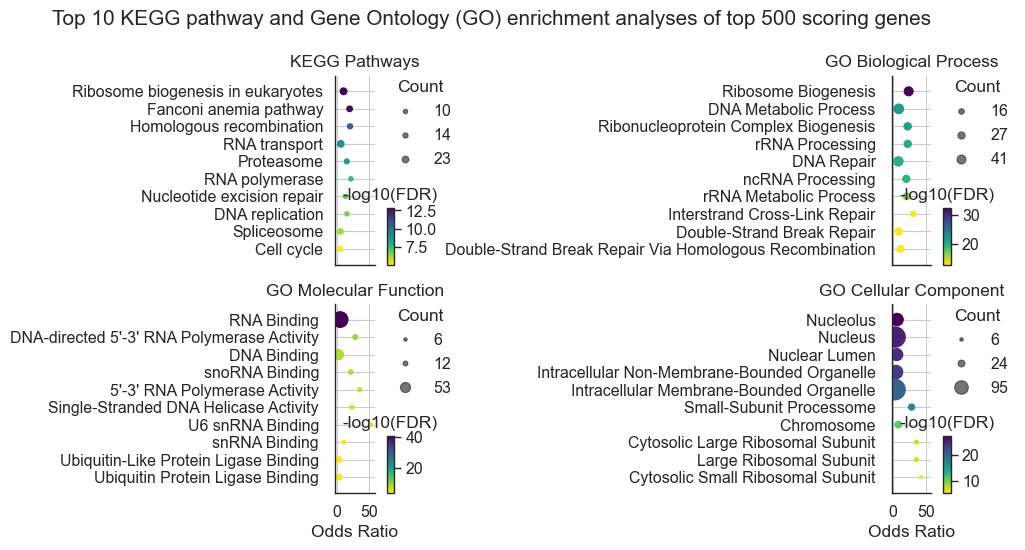

In [17]:
# tried to imitate the plot seen here: 
# https://www.researchgate.net/figure/Top-10-gene-ontology-GO-and-reactome-pathway-enrichment-analyses-of-226-common-DEGs_fig2_350128204

fig, ax = plt.subplots(2, 2, figsize=(10, 5.6), sharex=True)

top10bp = format_results(enr_BP)
top10mf = format_results(enr_MF)
top10cc = format_results(enr_CC)

# not sure if I just want to use goatools. Enrichr seems to exclude parent nodes and only use child nodes
# top10bp = godf.sort_values(by="p_fdr_bh").query("NS == 'BP'").iloc[:10,:]
# top10mf = godf.sort_values(by="p_fdr_bh").query("NS == 'MF'").iloc[:10,:]
# top10cc = godf.sort_values(by="p_fdr_bh").query("NS == 'CC'").iloc[:10,:]
top10keggpathways = format_results(enr_pathways)

def fix_text(s):
    s = s.replace("double-strand break", "DSB")
    return s

def plot_enricher_study_results(df, ax, title):
    df = df.iloc[::-1,:]
    # df["Odds Ratio"] = df["Odds Ratio"].apply(eval)
    scatter = ax.scatter(
        y=df["name"], 
        x=df["Odds Ratio"],
        s=df["study_count"],
        c=-np.log10(df["p_fdr_bh"]),
        cmap='viridis_r')
    ax.set_title(title)
    ax.set_xlabel("Odds Ratio")
    # ax.set_yticklabels([l.get_text().replace("Double-Strand Break ", "''DSB'' ") for l in ax.get_yticklabels()])
    ax.set_yticklabels(ax.get_yticklabels())
    
    handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
    legend2 = ax.legend(handles[::3][:3], labels[::3][:3], loc="upper left", title="Count", frameon=False, bbox_to_anchor=(1, 1.05))
    # legend2.get_title().set_fontsize('10')
    cbar = plt.colorbar(scatter, shrink=0.3, pad=0.2, anchor=(0,0), aspect=8)
    cbar.ax.set_title("-log10(FDR)")
    ax.margins(0.1) 
    ax.grid(True)

plot_enricher_study_results(top10keggpathways, ax[0,0], "KEGG Pathways")
plot_enricher_study_results(top10bp, ax[0,1], "GO Biological Process")
plot_enricher_study_results(top10mf, ax[1,0], "GO Molecular Function")
plot_enricher_study_results(top10cc, ax[1,1], "GO Cellular Component")

ax[0,0].set_xlabel(None)
ax[0,1].set_xlabel(None)

plt.gcf().suptitle("Top 10 KEGG pathway and Gene Ontology (GO) enrichment analyses of top 500 scoring genes")
# plt.gcf().subplots_adjust(left=0.1,
#                     bottom=0.1,
#                     right=0.9,
#                     top=0.85,
#                     wspace=1.05, 
#                     hspace=0.45)
plt.gcf().tight_layout(w_pad=3, rect=(0.0, 0, 0.98, 1))
plt.gcf().savefig("artifacts/fig_3b.pdf")
plt.gcf().savefig("artifacts/fig_3b.png")


From https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3637064/


The ontology category contains gene-set libraries created from the three gene ontology trees [6] and from the knockout mouse phenotypes ontology developed by the Jackson Lab from their MGI-MP browser [38]. To create such gene-set libraries, we “cut” the tree at either the third or fourth level and created a gene set from the terms and their associated genes downstream of the cut. The details about creating the Gene Ontology gene-set libraries are provided in our previous publication, Lists2Networks [24].

This explains why some GO Terms are missing